In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
data={'City':cities}
weather_df=pd.DataFrame(data=data)
weather_df['Lat']=""
weather_df['Lng']=""
weather_df['Lng']=""
weather_df['Max Temp']=""
weather_df['Humidity']=""
weather_df['Cloudiness']=""
weather_df['Wind Speed']=""
weather_df['Country']=""
weather_df['Date']=""
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cheremshan,,,,,,,,
1,rikitea,,,,,,,,
2,kalmunai,,,,,,,,
3,sinnamary,,,,,,,,
4,kazanskoye,,,,,,,,


In [4]:
city=[]
temp=[]
lat=[]
lng=[]
maxt=[]
hum=[]
cld=[]
ws=[]
cntry=[]
date=[]
index=1
for citi in cities:
    url=f"https://api.openweathermap.org/data/2.5/weather?q={citi}&units=imperial&APPID={weather_api_key}"
    try:
        response = requests.get(url).json()
        city.append(response['name'])
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxt.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        cntry.append(response['sys']['country'])
        date.append(response['dt'])

        print(f"{index}: The current temp for {citi} is: {response['main']['temp']}")
    
    except(KeyError,IndexError):
        print(f"{index}: Missing field/result for {citi}... skipping.")
    print("------------")
    index=index+1

1: The current temp for cheremshan is: 56.19
------------
2: The current temp for rikitea is: 71.01
------------
3: The current temp for kalmunai is: 80.02
------------
4: The current temp for sinnamary is: 78.53
------------
5: The current temp for kazanskoye is: 51.78
------------
6: The current temp for torbay is: 57.72
------------
7: The current temp for albany is: 78.57
------------
8: The current temp for saint-leu is: 65.26
------------
9: The current temp for aripuana is: 84.67
------------
10: The current temp for tuatapere is: 45.82
------------
11: The current temp for bang saphan is: 78.3
------------
12: The current temp for saint george is: 95.61
------------
13: The current temp for antigonish is: 72.18
------------
14: The current temp for shelburne is: 79.74
------------
15: Missing field/result for marcona... skipping.
------------
16: The current temp for ushuaia is: 35.26
------------
17: The current temp for longyearbyen is: 42.37
------------
18: The current temp

143: The current temp for mount isa is: 49.77
------------
144: The current temp for kemijarvi is: 55.62
------------
145: The current temp for sibolga is: 76.51
------------
146: The current temp for nanchong is: 76.21
------------
147: The current temp for cururupu is: 75.2
------------
148: Missing field/result for amderma... skipping.
------------
149: Missing field/result for grand river south east... skipping.
------------
150: The current temp for tasiilaq is: 38.84
------------
151: Missing field/result for paradwip... skipping.
------------
152: The current temp for ullapool is: 58.37
------------
153: The current temp for omboue is: 73.8
------------
154: The current temp for port said is: 80.58
------------
155: Missing field/result for manzil tamim... skipping.
------------
156: The current temp for kununurra is: 57.18
------------
157: The current temp for manta is: 76.78
------------
158: The current temp for jamestown is: 80.76
------------
159: The current temp for ayan

282: The current temp for nuuk is: 52.88
------------
283: The current temp for alta floresta is: 82.38
------------
284: The current temp for alofi is: 80.49
------------
285: The current temp for henties bay is: 68.13
------------
286: The current temp for constitucion is: 51.12
------------
287: The current temp for komsomolskiy is: 79.52
------------
288: The current temp for aransas pass is: 88.54
------------
289: Missing field/result for jabiru... skipping.
------------
290: The current temp for broome is: 81.07
------------
291: The current temp for krasnoturansk is: 66.99
------------
292: The current temp for oranjestad is: 82.35
------------
293: The current temp for narsaq is: 50.47
------------
294: The current temp for pacific grove is: 64.42
------------
295: The current temp for nishihara is: 79.88
------------
296: The current temp for seoul is: 79.74
------------
297: The current temp for kaitangata is: 46.45
------------
298: The current temp for mogadishu is: 76.21


423: The current temp for malhador is: 72.25
------------
424: The current temp for palauig is: 81.43
------------
425: The current temp for marseille is: 71.83
------------
426: The current temp for fairbanks is: 65.88
------------
427: The current temp for ayr is: 65.8
------------
428: The current temp for ambon is: 75.34
------------
429: The current temp for kang is: 43.66
------------
430: The current temp for arrecife is: 71.58
------------
431: The current temp for haga is: 64.8
------------
432: The current temp for sao joao do piaui is: 80.38
------------
433: The current temp for aksu is: 83.01
------------
434: The current temp for barbalha is: 84
------------
435: The current temp for arica is: 62.83
------------
436: The current temp for zelenoborsk is: 47.53
------------
437: The current temp for cherskiy is: 50.4
------------
438: The current temp for lethem is: 77.05
------------
439: The current temp for mount gambier is: 51.71
------------
440: The current temp for s

565: The current temp for pimentel is: 70
------------
566: The current temp for basoda is: 76.37
------------
567: The current temp for kjollefjord is: 44.73
------------
568: The current temp for ubon ratchathani is: 75.09
------------
569: The current temp for amazar is: 61.09
------------
570: The current temp for amahai is: 76.01
------------
571: The current temp for mandalgovi is: 58.55
------------
572: The current temp for great falls is: 91.74
------------
573: The current temp for katsuura is: 78.26
------------
574: The current temp for ahipara is: 59.41
------------
575: The current temp for evensk is: 49.23
------------
576: The current temp for oron is: 73.65
------------
577: The current temp for bagdarin is: 56.84
------------
578: Missing field/result for samusu... skipping.
------------
579: The current temp for lasa is: 57.99
------------
580: The current temp for ombessa is: 67.12
------------
581: The current temp for mount pleasant is: 85.1
------------
582: The 

In [7]:
data={'City':city}
weather_df=pd.DataFrame(data=data)
weather_df['Lat']=lat
weather_df['Lng']=lng
weather_df['Max Temp']=maxt
weather_df['Humidity']=hum
weather_df['Cloudiness']=cld
weather_df['Wind Speed']=ws
weather_df['Country']=cntry
weather_df['Date']=date
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cheremshan,54.6667,51.5000,56.19,49,40,3.40,RU,1627249903
1,Rikitea,-23.1203,-134.9692,71.01,67,19,4.70,PF,1627249904
2,Kalmunai,7.4167,81.8167,80.02,79,100,4.85,LK,1627249904
3,Sinnamary,5.3833,-52.9500,78.53,82,81,6.64,GF,1627249905
4,Kazanskoye,55.6448,69.2350,51.78,79,1,9.73,RU,1627249905


In [8]:
weather_df.describe()     

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.017531,19.148050,69.625133,70.596803,51.914742,7.584174,1.627250e+09
std,33.269123,92.072718,14.661188,20.429180,38.188144,5.210025,1.246561e+02
min,-54.800000,-179.166700,35.100000,10.000000,0.000000,0.000000,1.627249e+09
25%,-7.678300,-65.407400,58.110000,59.000000,15.000000,3.740000,1.627250e+09
50%,20.966700,24.433600,71.560000,75.000000,52.000000,5.970000,1.627250e+09
75%,47.735450,98.383300,80.380000,86.500000,90.500000,10.680000,1.627250e+09
max,78.218600,178.416700,107.130000,100.000000,100.000000,26.460000,1.627250e+09


In [12]:
weather_df.to_csv(r'/Users/owner/Desktop/DataClass/python-api-challenge/cities_df.csv',index=False,header=True)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cheremshan,54.6667,51.5000,56.19,49,40,3.40,RU,1627249903
1,Rikitea,-23.1203,-134.9692,71.01,67,19,4.70,PF,1627249904
2,Kalmunai,7.4167,81.8167,80.02,79,100,4.85,LK,1627249904
3,Sinnamary,5.3833,-52.9500,78.53,82,81,6.64,GF,1627249905
4,Kazanskoye,55.6448,69.2350,51.78,79,1,9.73,RU,1627249905


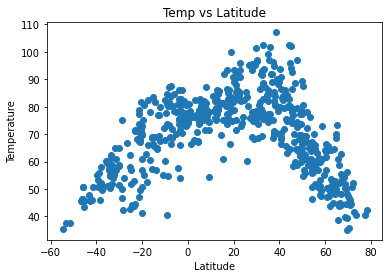

The plot is showing that as you move closer to the subtropical climate zone of high pressure between latitudes 25 to 40 degrees the temperature rises, and as you move away from those points it drops.


In [48]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temp vs Latitude')
plt.savefig('Temp vs Latitude.png')
plt.show()

print("The plot is showing that as you move closer to the subtropical climate zone of high pressure between latitudes 25 to 40 degrees the temperature rises, and as you move away from those points it drops.")


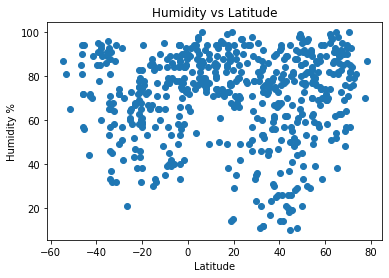

This plot seems to show little correlation between humidity levels and latitude. We can however see that the same area that had the highest temperatures also seems to have a higher likelyhood of lower humidity


In [49]:
x_values = weather_df['Lat']
y2_values = weather_df['Humidity']
plt.scatter(x_values,y2_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity vs Latitude')
plt.savefig('Humidity vs Latitude.png')
plt.show()

print("This plot seems to show little correlation between humidity levels and latitude. We can however see that the same area that had the highest temperatures also seems to have a higher likelyhood of lower humidity")


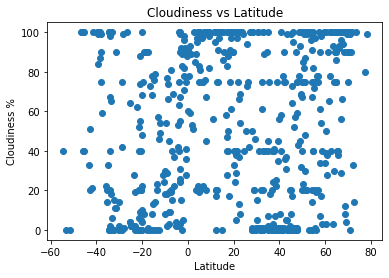

This plot seems to show the majority of cloudiness level lie at the extremes. We can also see a bit correlation where the areas of lower humidity have a lower cloudiness percentage and vise versa


In [50]:
x_values = weather_df['Lat']
y3_values = weather_df['Cloudiness']
plt.scatter(x_values,y3_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness vs Latitude')
plt.savefig('Cloudiness vs Latitude.png')
plt.show()

print("This plot seems to show the majority of cloudiness level lie at the extremes. We can also see a bit correlation where the areas of lower humidity have a lower cloudiness percentage and vise versa")

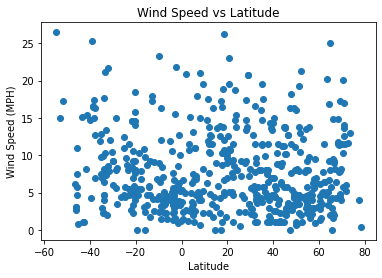

This plot shows that at this time of year most places in the world at least according to their latitude had windspeeds below 15 mph


In [51]:
x_values = weather_df['Lat']
y4_values = weather_df['Wind Speed']
plt.scatter(x_values,y4_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed vs Latitude')
plt.savefig('Wind Speed vs Latitude.png')
plt.show()

print("This plot shows that at this time of year most places in the world at least according to their latitude had windspeeds below 15 mph")

In [52]:
north_df=weather_df.loc[weather_df['Lat'] > 0]
south_df=weather_df.loc[weather_df["Lat"]<0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cheremshan,54.6667,51.5000,56.19,49,40,3.40,RU,1627249903
2,Kalmunai,7.4167,81.8167,80.02,79,100,4.85,LK,1627249904
3,Sinnamary,5.3833,-52.9500,78.53,82,81,6.64,GF,1627249905
4,Kazanskoye,55.6448,69.2350,51.78,79,1,9.73,RU,1627249905
5,Torbay,47.6666,-52.7314,58.75,88,75,11.50,CA,1627249906


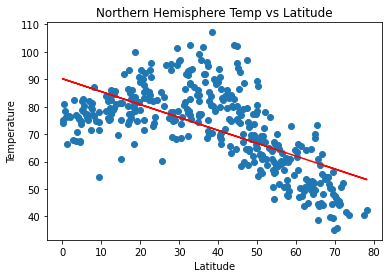

The regression line is showing that as you move away from the equator the temperature declines


In [53]:
xn_values = north_df['Lat']
yn_values = north_df['Max Temp']
plt.scatter(xn_values,yn_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere Temp vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)

regress_values_ntemp = xn_values * slope + intercept
plt.plot(xn_values,regress_values_ntemp,"r-")

plt.savefig('Northern Hemisphere Temp vs Latitude.png')
plt.show()

print("The regression line is showing that as you move away from the equator the temperature declines")

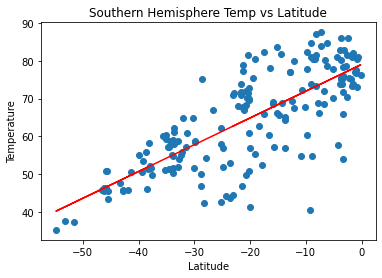

This regression line is showing a more consistent correlation between temperature and latitude than the Northern hemisphere graph. Where the temperature more sharply increases as you move toward the equator


In [54]:
xs_values = south_df['Lat']
ys_values = south_df['Max Temp']
plt.scatter(xs_values,ys_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere Temp vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)

regress_values_stemp = xs_values * slope + intercept
plt.plot(xs_values,regress_values_stemp,"r-")

plt.savefig('Southern Hemisphere Temp vs Latitude.png')
plt.show()

print("This regression line is showing a more consistent correlation between temperature and latitude than the Northern hemisphere graph. Where the temperature more sharply increases as you move toward the equator")

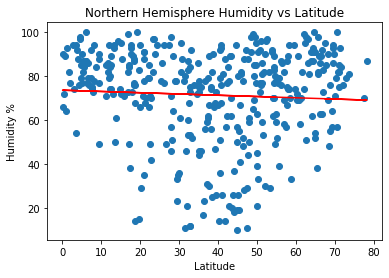

This regression line shows the likelyhood of a slight drop in humidity as you move away from the equator, but a higher likelyhood that the humidity regardless of latitude is likely to be closer  to 70%


In [55]:
xn_values = north_df['Lat']
yn1_values = north_df['Humidity']
plt.scatter(xn_values,yn1_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Humidity vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn1_values)

regress_values_ntemp = xn_values * slope + intercept
plt.plot(xn_values,regress_values_ntemp,"r-")

plt.savefig('Northern Hemisphere Humidity vs Latitude.png')
plt.show()

print("This regression line shows the likelyhood of a slight drop in humidity as you move away from the equator, but a higher likelyhood that the humidity regardless of latitude is likely to be closer  to 70%")

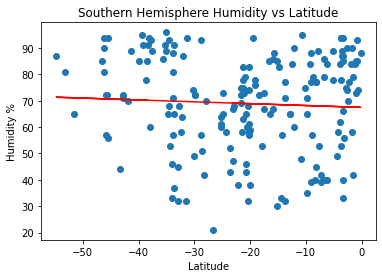

This regression line is showing a very similar situation as what we saw in the Northern Hemisphere, but the slight increase in humidity comes as you move away from the equator rather that towards it.


In [56]:
xs_values = south_df['Lat']
ys1_values = south_df['Humidity']
plt.scatter(xs_values,ys1_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Humidity vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys1_values)

regress_values_stemp = xs_values * slope + intercept
plt.plot(xs_values,regress_values_stemp,"r-")

plt.savefig('Southern Hemisphere Humidity vs Latitude.png')
plt.show()

print("This regression line is showing a very similar situation as what we saw in the Northern Hemisphere, but the slight increase in humidity comes as you move away from the equator rather that towards it.")

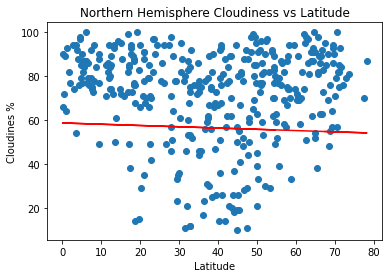

This regression line shows a high likelyhood for the cloudiness regarless of latitude to be around 60%, with a slight decrease as you move away from the equator


In [57]:
xn_values = north_df['Lat']
yn2_values = north_df['Cloudiness']
plt.scatter(xn_values,yn1_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudines %')
plt.title('Northern Hemisphere Cloudiness vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn2_values)

regress_values_ntemp = xn_values * slope + intercept
plt.plot(xn_values,regress_values_ntemp,"r-")

plt.savefig('Northern Hemisphere Cloudiness vs Latitude.png')
plt.show()

print("This regression line shows a high likelyhood for the cloudiness regarless of latitude to be around 60%, with a slight decrease as you move away from the equator")

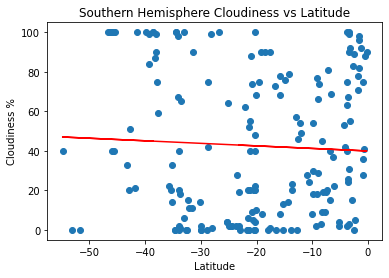

This regression line is showing a slight decrease in cloudiness as you move closer to the equator.


In [58]:
xs_values = south_df['Lat']
ys2_values = south_df['Cloudiness']
plt.scatter(xs_values,ys2_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere Cloudiness vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys2_values)

regress_values_stemp = xs_values * slope + intercept
plt.plot(xs_values,regress_values_stemp,"r-")

plt.savefig('Southern Hemisphere Cloudiness vs Latitude.png')
plt.show()

print("This regression line is showing a slight decrease in cloudiness as you move closer to the equator.") 

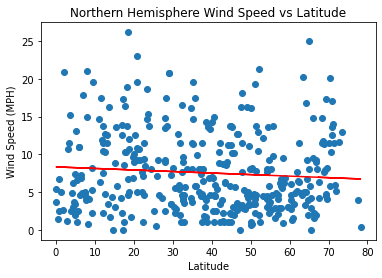

This regression line shows a slight decrease in wind speed as you move away from the equator, but an overall consistent windspeed regardless of distance from the equator in the Northern Hemisphere


In [59]:
xn_values = north_df['Lat']
yn3_values = north_df['Wind Speed']
plt.scatter(xn_values,yn3_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Northern Hemisphere Wind Speed vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn3_values)

regress_values_ntemp = xn_values * slope + intercept
plt.plot(xn_values,regress_values_ntemp,"r-")

plt.savefig('Northern Hemisphere Wind Speed vs Latitude.png')
plt.show()

print("This regression line shows a slight decrease in wind speed as you move away from the equator, but an overall consistent windspeed regardless of distance from the equator in the Northern Hemisphere")

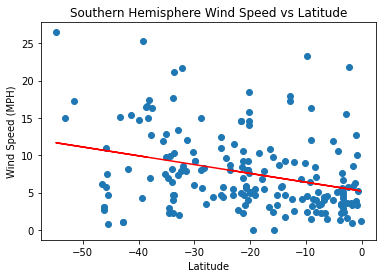

This regression line is showing a decrease in wind speed as you move closer to the equator the decrease is at a quicker rate when compared to the northern hemisphere regression line.


In [46]:
xs_values = south_df['Lat']
ys3_values = south_df['Wind Speed']
plt.scatter(xs_values,ys3_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Southern Hemisphere Wind Speed vs Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys3_values)

regress_values_stemp = xs_values * slope + intercept
plt.plot(xs_values,regress_values_stemp,"r-")

plt.savefig('Southern Hemisphere Wind Speed vs Latitude.png')
plt.show()

print("This regression line is showing a decrease in wind speed as you move closer to the equator the decrease is at a quicker rate when compared to the northern hemisphere regression line.") 